In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression                     # Logistic Regression( It is a classifier)
from sklearn.svm import SVC                                             # Support Vector Machine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier                      # K -Nearest Neighbors
from sklearn.gaussian_process import GaussianProcessClassifier          # Gaussian Process Classifier
from sklearn.tree import DecisionTreeClassifier                         # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                     # Random Forest and AdaBoost Classifiers
from sklearn.naive_bayes import GaussianNB                              # Gaussian Naive bayes Classifier
from sklearn.svm import LinearSVC

In [15]:
df=pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking the list of columns

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Finding How many output types are there in Target variable

In [18]:
df['Class'].unique()

array([0, 1], dtype=int64)

**We can see it has two o/p's 0& 1**
* 0- Non Fradulent
* 1- Fradulent

# Checking the count of values

In [23]:
pd.DataFrame(df['Class'].value_counts())

,Class
0,284315
1,492


# Data Pre-Processing

In [25]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
# We can remove Time here, since it is irrelevant
df_new=df.drop('Time',axis=1)

In [53]:
df_new.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
# We can see there are no missing values, since it is a cleaned data

In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           284807 non-null  float64
 1   V2           284807 non-null  float64
 2   V3           284807 non-null  float64
 3   V4           284807 non-null  float64
 4   V5           284807 non-null  float64
 5   V6           284807 non-null  float64
 6   V7           284807 non-null  float64
 7   V8           284807 non-null  float64
 8   V9           284807 non-null  float64
 9   V10          284807 non-null  float64
 10  V11          284807 non-null  float64
 11  V12          284807 non-null  float64
 12  V13          284807 non-null  float64
 13  V14          284807 non-null  float64
 14  V15          284807 non-null  float64
 15  V16          284807 non-null  float64
 16  V17          284807 non-null  float64
 17  V18          284807 non-null  float64
 18  V19          284807 non-

# Lets check the descriptive Statistics

In [33]:
df_new.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


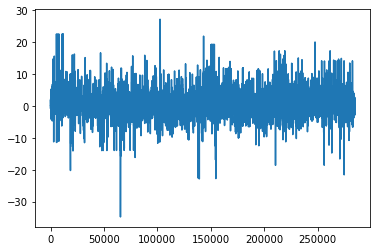

In [126]:
plt.plot(df_new['V21'])

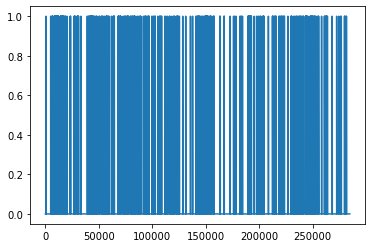

In [129]:
plt.plot(df_new['Class'])

In [55]:
df_new['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

# Transforming or Normalizing the values 

In [56]:
df_new['norm_amount'] = StandardScaler().fit_transform(df_new['Amount'].values.reshape(-1,1))
df_new = df_new.drop(['Amount'], axis=1)

In [57]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


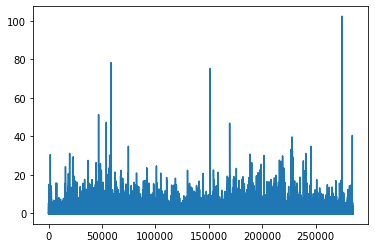

In [130]:
plt.plot(df_new['norm_amount'])

# Split the data

In [58]:
X=df_new.drop('Class',axis=1)
y=df_new['Class']

# Using Train test Split for splitting into train and test set

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

In [67]:
y_train.shape,y_test.shape

((199364,), (85443,))

In [70]:
# Now we need to use the data in a model
# We will use the Decision Tree Classifier Here (Classifier, because we have to classify if it is fraud or not)

In [72]:
def decision_tree_classification(X_train, y_train, X_test, y_test):
    
    # initialize object for DecisionTreeClassifier class
    dt_classifier = DecisionTreeClassifier()
    
    # train model by using fit method
    print("Model training starts........")
    
    dt_classifier.fit(X_train, y_train.values.ravel())
    print("Model training completed")
    
    acc_score = dt_classifier.score(X_test, y_test)
    print(f'Accuracy of model on test dataset :- {acc_score}')
    
    # predict result using test dataset
    y_pred = dt_classifier.predict(X_test)
    
    # confusion matrix
    print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

In [73]:
# calling the Algorithm
decision_tree_classification(X_train, y_train, X_test, y_test)

Model training starts........
Model training completed
Accuracy of model on test dataset :- 0.9992626663389628
Confusion Matrix :- 
 [[85267    37]
 [   26   113]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.75      0.81      0.78       139

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# As we can see the accuracy quite high, as high as 99%
# That is because all the number of samples are unbalanced

# Here we can change the Unbalanced data using the `sampling techniques`

**For undersampling techniques, we are checking the number of samples of both classes and selecting the smaller number and taking random samples from other class samples to create a new dataset.**

**The new dataset has an equal number of samples for both target classes.**

In [99]:
# Now check the value count of class for reference
class_val=df_new['Class'].value_counts()
class_val

0    284315
1       492
Name: Class, dtype: int64

In [101]:
fraud=class_val[1]
no_fraud=class_val[0]

In [102]:
fraud

492

In [90]:
no_fraud

284315

# Changing both the target samples to the same level

In [104]:
no_fraud_indexies = np.array(df_new[df_new['Class'] == 0].index)
fraud_indices = np.array(df_new[df_new['Class'] == 1].index)

# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(no_fraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)


# Undersampling techniques

# concatenate both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = df_new.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]
# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample_data, y_undersample_data, test_size=0.2, random_state=0)

In [111]:
X_train_sample.shape,y_train_sample.shape

((787, 29), (787, 1))

In [113]:
X_test_sample.shape,y_test_sample.shape

((197, 29), (197, 1))

# Now using Decision tree using the new samples

In [105]:
decision_tree_classification(X_train_sample, y_train_sample, 
X_test_sample, y_test_sample)

Model training starts........
Model training completed
Accuracy of model on test dataset :- 0.9137055837563451
Confusion Matrix :- 
 [[96 10]
 [ 7 84]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       106
           1       0.89      0.92      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



# Now checking for the other algorithms

In [115]:
models = {
          'LinearSVC': LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'LogisticRegression': LogisticRegression(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GaussianProcess Classifier':GaussianProcessClassifier(),
          'Decision Tree':DecisionTreeClassifier(),
          'Gaussian Naive bayes':GaussianNB()
         }
np.random.seed(25)
# Create an empty dictionary called results
results = {}
A=[LinearSVC(),KNeighborsClassifier(),SVC(),LogisticRegression(),RandomForestClassifier(),
          GaussianProcessClassifier(),DecisionTreeClassifier(),GaussianNB()]
B=[]

for i in range(0,len(A)):
    clf=A[i]
    clf.fit(X_train_sample,y_train_sample)
    B.append(clf.score(X_test_sample,y_test_sample))
B
D=pd.DataFrame(B,list(models.keys()))
D

C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-115-f355df651833>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train_sample,y_train_sample)
C:\Users\shanm\Desktop\MiniConda\sampleproject\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

,0
LinearSVC,0.944162
KNN,0.959391
SVC,0.949239
LogisticRegression,0.944162
RandomForestClassifier,0.954315
GaussianProcess Classifier,0.954315
Decision Tree,0.918782
Gaussian Naive bayes,0.923858


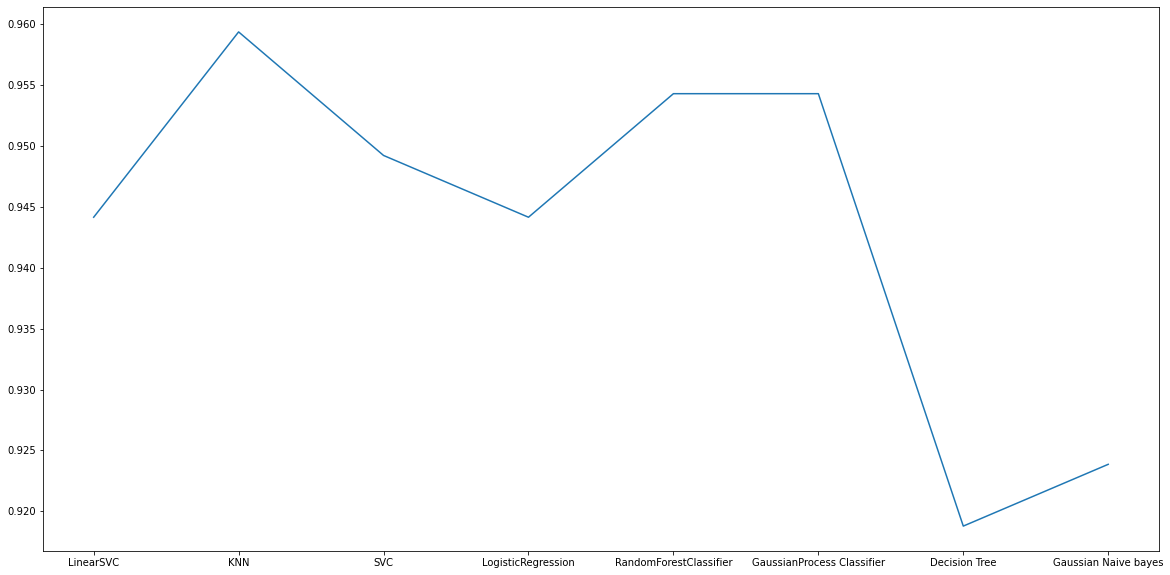

In [142]:
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(D)